<a href="https://colab.research.google.com/github/Murthy-Kolluru/modelthinking/blob/main/SchellingSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the Segregation problem through data frames

The next three functions are for creating a data frame, its neigbor through a swapping operation (an agent moves to an empty place and plotting a given data frame

In [1]:
#Create a random dataframe with all the properties

import numpy as np
import pandas as pd

def create_df(size, occupancy_percentage):
    # Calculate the number of occupied cells
    num_occupied = int(size ** 2 * occupancy_percentage / 100)

    # Create an array of size^2 with 1s in occupied cells and 0s in unoccupied cells
    occupied_cells = np.concatenate((np.ones(num_occupied), np.zeros(size ** 2 - num_occupied)))
    np.random.shuffle(occupied_cells)

    # Create a DataFrame
    df = pd.DataFrame({'ID': range(1, size ** 2 + 1), 'Occupied': occupied_cells})

    # Define function to populate properties
    def populate_properties(row):
        if row['Occupied'] == 1:
            # If occupied, assign values 1 or 2 with equal probability
            return np.random.randint(1, 3)
        else:
            # If unoccupied, assign 0
            return 0

    # Add new columns with populated values
    df['fin_pref'] = df.apply(populate_properties, axis=1)
    df['rel_pref'] = df.apply(populate_properties, axis=1)
    df['acad_pref'] = df.apply(populate_properties, axis=1)

    return df

# Example usage:
df = create_df(3, 90)
print(df)  # Print the first 5 rows of the DataFrame


   ID  Occupied  fin_pref  rel_pref  acad_pref
0   1       1.0         1         2          1
1   2       1.0         2         1          1
2   3       1.0         2         2          1
3   4       1.0         1         1          2
4   5       1.0         2         2          1
5   6       1.0         1         2          1
6   7       1.0         2         2          2
7   8       1.0         2         1          2
8   9       0.0         0         0          0


In [2]:
#An occupied agent moves to an unoccupied spot to create a neighboring state

def create_neighbor(df, print_selected_rows=False):
    # Make a copy of the DataFrame to avoid modifying the original one
    df_1 = df.copy()

    # Select one row with Occupied=1 and another with Occupied=0
    occupied_indices = df[df['Occupied'] == 1].index
    unoccupied_indices = df[df['Occupied'] == 0].index

    if len(occupied_indices) == 0 or len(unoccupied_indices) == 0:
        # If there are no rows with Occupied=1 or Occupied=0, return original DataFrame
        return df_1, df_1

    occupied_index = np.random.choice(occupied_indices)
    unoccupied_index = np.random.choice(unoccupied_indices)
    print_selected_rows=True

    # Print the selected rows to swap if requested
    #if print_selected_rows:
        #print("Selected rows to swap:")
        #print("Occupied row (index {}):".format(occupied_index), df_1.loc[occupied_index, ['fin_pref', 'rel_pref', 'acad_pref']])
        #print("Unoccupied row (index {}):".format(unoccupied_index), df_1.loc[unoccupied_index, ['fin_pref', 'rel_pref', 'acad_pref']])

    # Swap the values of fin_pref, rel_pref, and acad_pref between the two rows
    df_1.loc[occupied_index, ['fin_pref', 'rel_pref', 'acad_pref']], df_1.loc[unoccupied_index, ['fin_pref', 'rel_pref', 'acad_pref']] = \
    df_1.loc[unoccupied_index, ['fin_pref', 'rel_pref', 'acad_pref']].values, df_1.loc[occupied_index, ['fin_pref', 'rel_pref', 'acad_pref']].values

    # Swap the Occupied status
    df_1.at[occupied_index, 'Occupied'] = 0
    df_1.at[unoccupied_index, 'Occupied'] = 1

    # Print both DataFrames after swapping if requested
    #if print_selected_rows:
        #print("\nDataFrames after swapping:")
        #print("Neighbor 1:")
        #print(df)
        #print("\nNeighbor 2:")
        #print(df_1)

    return df, df_1

df, df1 = create_neighbor(df)
#print("df:", df)
print("df1:", df1)


df1:    ID  Occupied  fin_pref  rel_pref  acad_pref
0   1       1.0         1         2          1
1   2       0.0         0         0          0
2   3       1.0         2         2          1
3   4       1.0         1         1          2
4   5       1.0         2         2          1
5   6       1.0         1         2          1
6   7       1.0         2         2          2
7   8       1.0         2         1          2
8   9       1.0         2         1          1


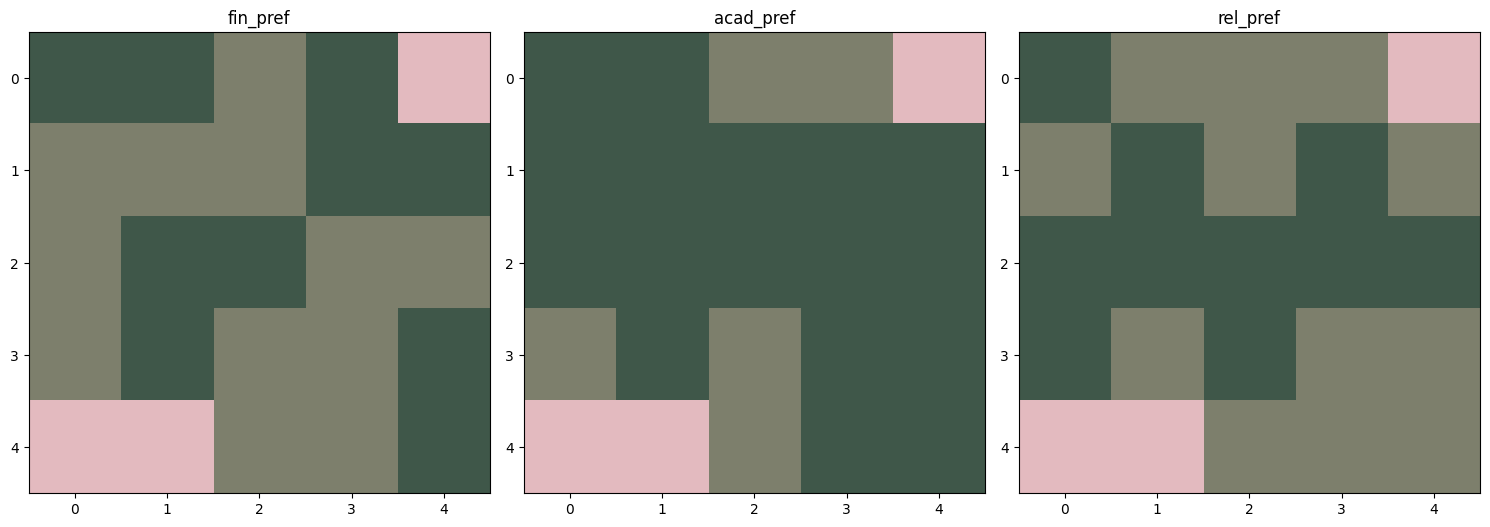

In [ ]:
#Plot the grid

import numpy as np
import matplotlib.pyplot as plt

def plot_grid(df):
    # Extracting relevant columns
    occupied = df['Occupied']
    fin_pref = df['fin_pref']
    acad_pref = df['acad_pref']
    rel_pref = df['rel_pref']

    # Calculate grid dimensions
    grid_size = int(np.sqrt(len(df)))

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Reshape data into a square grid
    occupied_grid = occupied.values.reshape((grid_size, grid_size))
    fin_pref_grid = fin_pref.values.reshape((grid_size, grid_size))
    acad_pref_grid = acad_pref.values.reshape((grid_size, grid_size))
    rel_pref_grid = rel_pref.values.reshape((grid_size, grid_size))

    # Plot for fin_pref
    ax = axes[0]
    ax.set_title('fin_pref')
    ax.imshow(fin_pref_grid, cmap='RdYlGn', interpolation='nearest')
    ax.imshow(np.ma.masked_where((occupied_grid == 1) & (fin_pref_grid == 1), np.ones_like(fin_pref_grid)), cmap='Reds', interpolation='nearest', alpha=0.5)
    ax.imshow(np.ma.masked_where((occupied_grid == 1) & (fin_pref_grid == 2), np.ones_like(fin_pref_grid)), cmap='Greens', interpolation='nearest', alpha=0.5)
    ax.imshow(np.ma.masked_where(occupied_grid == 0, np.ones_like(fin_pref_grid)), cmap='gray', interpolation='nearest', alpha=0.5)

    # Plot for acad_pref
    ax = axes[1]
    ax.set_title('acad_pref')
    ax.imshow(acad_pref_grid, cmap='RdYlGn', interpolation='nearest')
    ax.imshow(np.ma.masked_where((occupied_grid == 1) & (acad_pref_grid == 1), np.ones_like(acad_pref_grid)), cmap='Reds', interpolation='nearest', alpha=0.5)
    ax.imshow(np.ma.masked_where((occupied_grid == 1) & (acad_pref_grid == 2), np.ones_like(acad_pref_grid)), cmap='Greens', interpolation='nearest', alpha=0.5)
    ax.imshow(np.ma.masked_where(occupied_grid == 0, np.ones_like(acad_pref_grid)), cmap='gray', interpolation='nearest', alpha=0.5)

    # Plot for rel_pref
    ax = axes[2]
    ax.set_title('rel_pref')
    ax.imshow(rel_pref_grid, cmap='RdYlGn', interpolation='nearest')
    ax.imshow(np.ma.masked_where((occupied_grid == 1) & (rel_pref_grid == 1), np.ones_like(rel_pref_grid)), cmap='Reds', interpolation='nearest', alpha=0.5)
    ax.imshow(np.ma.masked_where((occupied_grid == 1) & (rel_pref_grid == 2), np.ones_like(rel_pref_grid)), cmap='Greens', interpolation='nearest', alpha=0.5)
    ax.imshow(np.ma.masked_where(occupied_grid == 0, np.ones_like(rel_pref_grid)), cmap='gray', interpolation='nearest', alpha=0.5)

    plt.tight_layout()
    plt.show()

#plot_grid(df)


The next 4 blocks have functions to find neighbor rows (if the data frame had a square grid shape), find the happiness of an agent based on its neighbors, running the happiness function on any data frame to compute happiness of each row and then compute the objective of the data frame

In [3]:
#Identifying the neighboring slots to compute happiness

def get_neighbors(size, agent_id):
    neighbors = {}
    for i in range(size):
        for j in range(size):
            current_cell = i * size + j
            neighbor_list = []
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    if dx == 0 and dy == 0:
                        continue
                    x = i + dx
                    y = j + dy
                    if 0 <= x < size and 0 <= y < size:
                        neighbor_list.append(x * size + y)
            neighbors[current_cell] = neighbor_list
    return neighbors[agent_id]

# Choose an ID to print its neighbors
agent_id = 2  # For example
neighbors = get_neighbors(3, agent_id)

# Print the neighbors of the chosen agent ID
print("Neighbors of agent ID", agent_id, ":", neighbors)


Neighbors of agent ID 2 : [1, 4, 5]


In [4]:
#Computing agent happiness based on neighbors

#Finding neighbor rows to a given row if the df was laid as a square grid.

def compute_agent_happiness(df, agent_id):
    # Check if the chosen agent's cell is unoccupied
    if df.at[agent_id, 'Occupied'] == 0:
        return

    # Extract preferences of the agent
    fin_pref = df.at[agent_id, 'fin_pref']
    acad_pref = df.at[agent_id, 'acad_pref']
    rel_pref = df.at[agent_id, 'rel_pref']

    # Initialize happiness variables
    fin_hap = 0
    acad_hap = 0
    rel_hap = 0
    neighb_hap = 0

    # Initialize temporary happiness variables
    fin_hap_temp = 0
    acad_hap_temp = 0
    rel_hap_temp = 0

    # Get neighbor grid IDs
    grid_size = int(np.sqrt(len(df)))  # Calculate the size of the grid
    neighbors = get_neighbors(grid_size, agent_id)  # Call get_neighbors with the grid size and agent ID

    # Drop neighbors where occupied value is 0
    valid_neighbors = [neighbor for neighbor in neighbors if df.at[neighbor, 'Occupied'] == 1]

    # Compute temporary happiness based on preferences
    for neighbor_id in valid_neighbors:
        neighbor_fin_pref = df.at[neighbor_id, 'fin_pref']
        neighbor_acad_pref = df.at[neighbor_id, 'acad_pref']
        neighbor_rel_pref = df.at[neighbor_id, 'rel_pref']

        if fin_pref == neighbor_fin_pref:
            fin_hap_temp += 1
        if acad_pref == neighbor_acad_pref:
            acad_hap_temp += 1
        if rel_pref == neighbor_rel_pref:
            rel_hap_temp += 1

    # Update happiness based on temporary happiness
    if fin_hap_temp >= 4:
        fin_hap += 1
    if acad_hap_temp >= 3:
        acad_hap += 1
    if rel_hap_temp >= 2:
        rel_hap += 1

    # Compute neighbor happiness
    neighb_hap = len(valid_neighbors) / 4

    # Compute total happiness
    total_happiness = fin_hap + acad_hap + rel_hap + neighb_hap

    return total_happiness

# Example usage:
# Assuming df is your DataFrame and agent_id is the ID of the agent
agent_id = 2
print("Agent", agent_id, "happiness:", compute_agent_happiness(df, agent_id))


Agent 2 happiness: 2.75


In [5]:
#Iterate on all rows and fill a new column called total happiness for each agent

def fill_happiness_columns(df):
    # Define function to compute happiness for each row
    def compute_and_fill_happiness(row):
        # Check if the agent's cell is unoccupied
        if row['Occupied'] == 0:
            return 0  # If unoccupied, return zero for total_happiness
        else:
            # Compute happiness
            happiness_value = compute_agent_happiness(df, row.name)
            return happiness_value

    # Apply the function to each row to fill the columns
    df['total_happiness'] = df.apply(compute_and_fill_happiness, axis=1)

    return df

# Example usage:
df_with_happiness = fill_happiness_columns(df)
df1_with_happiness = fill_happiness_columns(df1)
# Print the first 5 rows of the DataFrame after filling happiness columns
print("DataFrames after filling happiness columns:")
print("df:", df_with_happiness.head(10))
print("df1:", df1_with_happiness.head(10))


DataFrames after filling happiness columns:
df:    ID  Occupied  fin_pref  rel_pref  acad_pref  total_happiness
0   1       1.0         1         2          1             0.75
1   2       1.0         2         1          1             2.25
2   3       1.0         2         2          1             2.75
3   4       1.0         1         1          2             2.25
4   5       1.0         2         2          1             4.75
5   6       1.0         1         2          1             3.00
6   7       1.0         2         2          2             0.75
7   8       1.0         2         1          2             1.00
8   9       0.0         0         0          0             0.00
df1:    ID  Occupied  fin_pref  rel_pref  acad_pref  total_happiness
0   1       1.0         1         2          1             0.50
1   2       0.0         0         0          0             0.00
2   3       1.0         2         2          1             1.50
3   4       1.0         1         1          2     

In [7]:
#FInding Objective as count of agents that have more than 3.5 total_happiness

def calculate_objective(df, threshold):
    # Count rows with total happiness greater than or equal to the threshold
    objective = (df['total_happiness'] >= threshold).sum()

    return objective

# Example usage:
threshold = 2.25
print("Objective of data frame is:", calculate_objective(df, threshold))
print("Objective of neighbor data frame is:", calculate_objective(df1, threshold))

Objective of data frame is: 5
Objective of neighbor data frame is: 3


The next function is to pick one of the two data frames based on Metropolis criteria

In [11]:
#Choose between data frames

def select_df_based_on_temperature(T, df_1, df_2, threshold):
    # Compute objectives for both data frames
    obj1 = calculate_objective(df_1, threshold)
    obj2 = calculate_objective(df_2, threshold)

    # Print the objective values for both data frames
    #print("Objective value for df_1:", obj1)
    #print("Objective value for df_2:", obj2)

    # If df2 has higher objective, return df2
    if obj2 >= obj1:
        #print("Selected Selected DataFrame: df_2")
        return df_2

    # If df2 has lower objective, compute probability of selecting df2
    else:
        p = np.exp((obj2 - obj1) / T)
        #print("prob=", p)

        # Generate a random number between 0 and 1
        rand_num = np.random.rand()

        # If the random number is less than or equal to probability p, return df2
        if rand_num <= p:
            #print("Selected DataFrame: df_2")
            return df_2
        else:
            #print("Selected DataFrame: df_1")
            return df_1

# Example usage:
selected_df = select_df_based_on_temperature(10, df, df1, 2.25)
print(selected_df)


   ID  Occupied  fin_pref  rel_pref  acad_pref  total_happiness
0   1       1.0         1         2          1             0.75
1   2       1.0         2         1          1             2.25
2   3       1.0         2         2          1             2.75
3   4       1.0         1         1          2             2.25
4   5       1.0         2         2          1             4.75
5   6       1.0         1         2          1             3.00
6   7       1.0         2         2          2             0.75
7   8       1.0         2         1          2             1.00
8   9       0.0         0         0          0             0.00


The next two are main functions.  One for quickly checking a good temperature and the other for detailed iterations.

Iteration 10, Temperature 0.6302494097246091, Selected DataFrame Objective: 592
Iteration 20, Temperature 0.37735360253530714, Selected DataFrame Objective: 596
Iteration 30, Temperature 0.2259355409925655, Selected DataFrame Objective: 598
Iteration 10, Temperature 6.302494097246092, Selected DataFrame Objective: 605
Iteration 20, Temperature 3.7735360253530725, Selected DataFrame Objective: 610
Iteration 30, Temperature 2.2593554099256554, Selected DataFrame Objective: 606
Iteration 10, Temperature 63.02494097246091, Selected DataFrame Objective: 606
Iteration 20, Temperature 37.73536025353073, Selected DataFrame Objective: 603
Iteration 30, Temperature 22.593554099256554, Selected DataFrame Objective: 607
Max Objective for Start Temp 1: 598
Max Objective for Start Temp 10: 613
Max Objective for Start Temp 100: 607


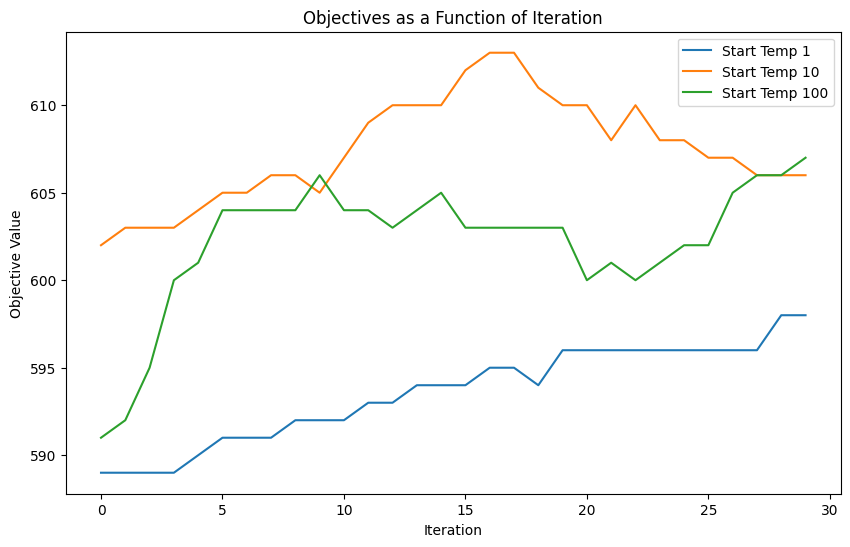

In [12]:
import matplotlib.pyplot as plt

def main(size, occupancy_percentage, start_temps, iterations, geometric_factor, threshold):
    all_objective_values = []
    max_objectives = []
    for start_temp in start_temps:
        objective_values = []
        df = create_df(size, occupancy_percentage)
        #print(df)
        max_objective = float('-inf')
        temp = start_temp
        #print(df.head())

        # Calculate objective for the initial DataFrame and store it as the first objective value
        #initial_objective = calculate_objective(df)
        #objective_values.append(initial_objective)

        for iter_num in range(1, iterations + 1):
            n1, n2 = create_neighbor(df)
            #print("n1:", n1)
            #print("n2:", n2)
            n1=fill_happiness_columns(n1)  # Add the total_happiness column
            n2=fill_happiness_columns(n2)
            #print("n1:", n1)
            #print("n2:", n2)
            selected_df = select_df_based_on_temperature(temp, n1, n2, threshold)

            # Calculate and print the objective of the selected DataFrame every 10th iteration
            selected_objective = calculate_objective(selected_df, threshold)
            if iter_num % 10 == 0:
                print(f"Iteration {iter_num}, Temperature {temp}, Selected DataFrame Objective: {selected_objective}")

            # Update the maximum objective
            max_objective = max(max_objective, selected_objective)
            objective_values.append(selected_objective)

            df = selected_df.drop(columns=['total_happiness'])
            temp *= geometric_factor  # Update temperature

        max_objectives.append(max_objective)
        all_objective_values.append(objective_values)

    # Print max objectives
    for i, max_obj in enumerate(max_objectives):
        print(f"Max Objective for Start Temp {start_temps[i]}: {max_obj}")

    # Plot objectives
    plt.figure(figsize=(10, 6))
    for i, obj_values in enumerate(all_objective_values):
        plt.plot(obj_values, label=f"Start Temp {start_temps[i]}")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title('Objectives as a Function of Iteration')
    plt.legend()
    plt.show()

# Example usage:
size = 30
occupancy_percentage = 90
start_temps = [1, 10, 100]
iterations = 30
geometric_factor = 0.95
threshold=3.5
main(size, occupancy_percentage, start_temps, iterations, geometric_factor, threshold)

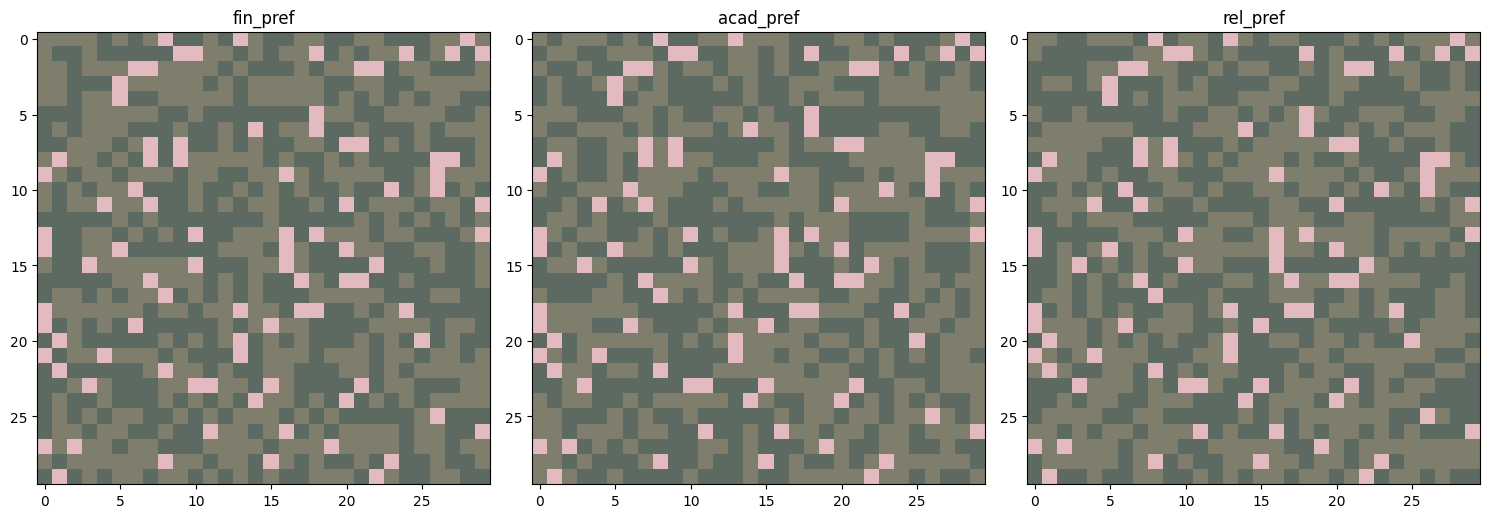

Iteration 10, Temperature 9.472780183201328, Selected DataFrame Objective: 602
Iteration 20, Temperature 8.91951630128563, Selected DataFrame Objective: 605
Iteration 30, Temperature 8.39856615589844, Selected DataFrame Objective: 602
Iteration 40, Temperature 7.9080424422606725, Selected DataFrame Objective: 599
Iteration 50, Temperature 7.446168084855218, Selected DataFrame Objective: 594
Iteration 60, Temperature 7.01126979941527, Selected DataFrame Objective: 595
Iteration 70, Temperature 6.601772030928906, Selected DataFrame Objective: 601
Iteration 80, Temperature 6.216191245698457, Selected DataFrame Objective: 597
Iteration 90, Temperature 5.853130556775848, Selected DataFrame Objective: 598
Iteration 100, Temperature 5.511274663302891, Selected DataFrame Objective: 600
Iteration 110, Temperature 5.189385085422692, Selected DataFrame Objective: 603
Iteration 120, Temperature 4.886295677499147, Selected DataFrame Objective: 604
Iteration 130, Temperature 4.600908403389778, Selec

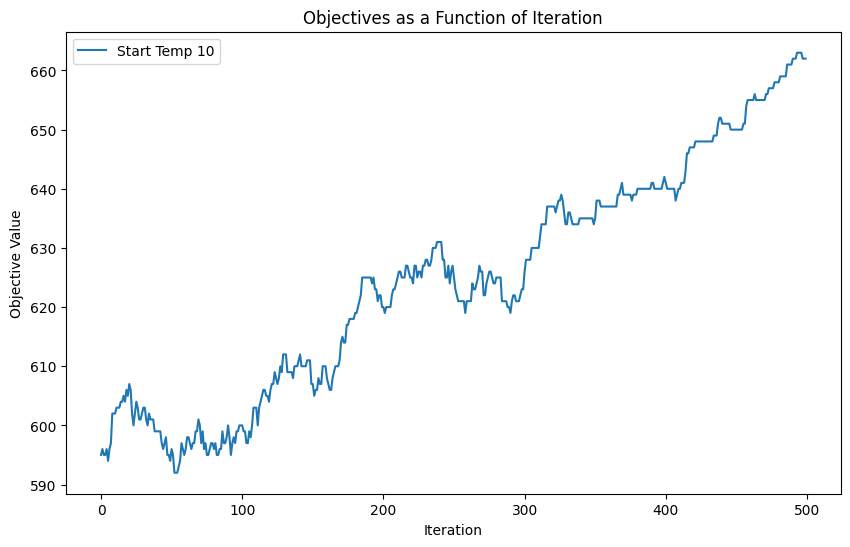

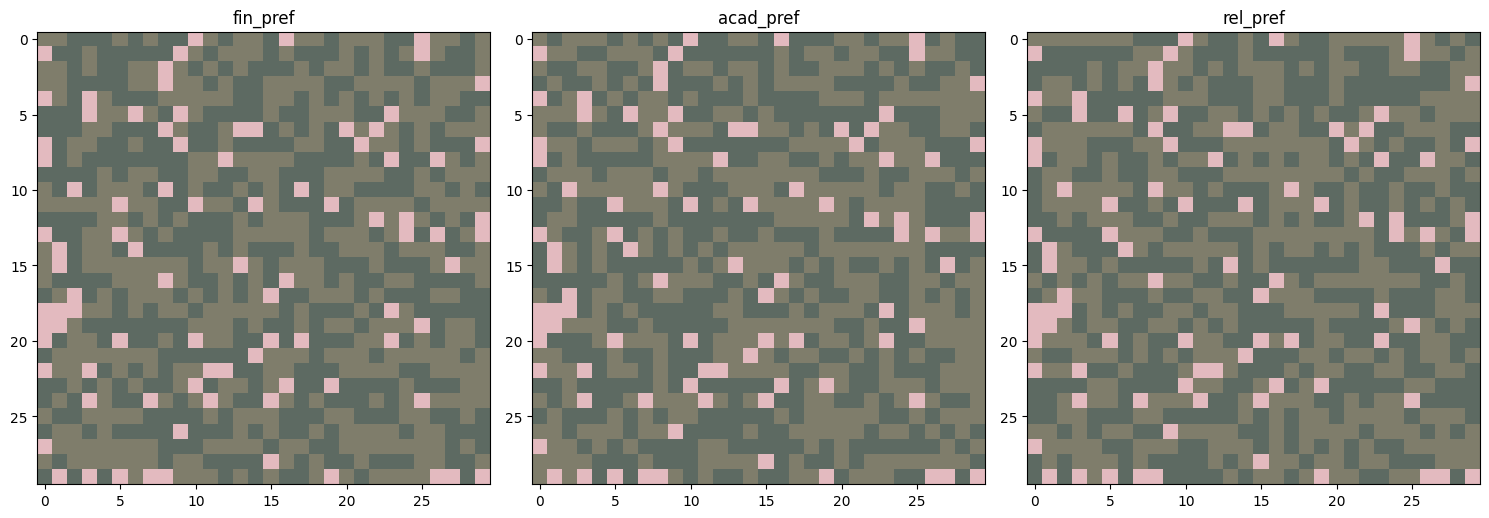

In [ ]:
import matplotlib.pyplot as plt

def main(size, occupancy_percentage, start_temps, iterations, geometric_factor, threshold):
    all_objective_values = []
    max_objectives = []
    df = create_df(size, occupancy_percentage)
    plot_grid(df)
    for start_temp in start_temps:
        objective_values = []
        #print(df)
        max_objective = float('-inf')
        temp = start_temp
        #print(df.head())

        # Calculate objective for the initial DataFrame and store it as the first objective value
        #initial_objective = calculate_objective(df)
        #objective_values.append(initial_objective)

        for iter_num in range(1, iterations + 1):
            n1, n2 = create_neighbor(df)
            #print("n1:", n1)
            #print("n2:", n2)
            n1=fill_happiness_columns(n1)  # Add the total_happiness column
            n2=fill_happiness_columns(n2)
            #print("n1:", n1)
            #print("n2:", n2)
            selected_df = select_df_based_on_temperature(temp, n1, n2,  threshold)

            # Calculate and print the objective of the selected DataFrame every 10th iteration
            selected_objective = calculate_objective(selected_df, threshold)
            if iter_num % 10 == 0:
                print(f"Iteration {iter_num}, Temperature {temp}, Selected DataFrame Objective: {selected_objective}")

            # Update the maximum objective
            max_objective = max(max_objective, selected_objective)
            objective_values.append(selected_objective)

            df = selected_df.drop(columns=['total_happiness'])
            temp *= geometric_factor  # Update temperature

        max_objectives.append(max_objective)
        all_objective_values.append(objective_values)

    # Print max objectives
    for i, max_obj in enumerate(max_objectives):
        print(f"Max Objective for Start Temp {start_temps[i]}: {max_obj}")

    # Plot objectives
    plt.figure(figsize=(10, 6))
    for i, obj_values in enumerate(all_objective_values):
        plt.plot(obj_values, label=f"Start Temp {start_temps[i]}")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title('Objectives as a Function of Iteration')
    plt.legend()
    plt.show()
    plot_grid(df)

# Example usage:
size = 30
occupancy_percentage = 90
start_temps = [10]
iterations = 500
geometric_factor = 0.994
threshold=3.5
main(size, occupancy_percentage, start_temps, iterations, geometric_factor, threshold)